In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
import matplotlib as mpl
from IPython.display import Image
from yt.units import G
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve_fft, Gaussian2DKernel
from matplotlib.colors import LogNorm
plt.rcParams['text.usetex'] = True
%matplotlib inline

In [2]:
DDname = 'DD0600'
#DDname = 'DD1049'


In [7]:
ds_n = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_selfshield_z15/%s/%s'%(DDname, DDname))
ds_f = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_nref10f_selfshield_z6/%s/%s'%(DDname, DDname))

#ds_n = yt.load('/Volumes/gdrive/foggie/halo_008508/nref11n_selfshield_z15/%s/%s'%(DDname, DDname))
#ds_f = yt.load('/Volumes/gdrive/foggie/halo_008508/nref11n_nref10f_selfshield_z6/%s/%s'%(DDname, DDname))


ad_n = ds_n.all_data()
ad_f = ds_f.all_data()

yt : [INFO     ] 2019-02-06 16:40:13,876 Parameters: current_time              = 183.06652781829
yt : [INFO     ] 2019-02-06 16:40:13,877 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-02-06 16:40:13,878 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-06 16:40:13,879 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-02-06 16:40:13,880 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-06 16:40:13,881 Parameters: current_redshift          = 1.6720386378662
yt : [INFO     ] 2019-02-06 16:40:13,881 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-02-06 16:40:13,882 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-02-06 16:40:13,883 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-02-06 16:40:13,914 Parameters: current_time              = 183.06652781829
yt : [INFO     ] 2019-02-06 16:40:13,915 Parameters: domain_dimensions         = [256 

In [8]:
gp_n = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_selfshield_z15_%s_galprops.npy'%DDname, encoding = 'latin1')[()]
gp_f = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_nref10f_selfshield_z6_%s_galprops.npy'%DDname, encoding = 'latin1')[()]


In [9]:
gas_vx_n_o = ad_n['gas', 'velocity_x']
gas_vy_n_o = ad_n['gas', 'velocity_y']
gas_vz_n_o = ad_n['gas', 'velocity_z']

gas_x_n_o = ad_n['gas', 'x']
gas_y_n_o = ad_n['gas', 'y']
gas_z_n_o = ad_n['gas', 'z']

gas_vx_f_o = ad_f['gas', 'velocity_x']
gas_vy_f_o = ad_f['gas', 'velocity_y']
gas_vz_f_o = ad_f['gas', 'velocity_z']

gas_x_f_o = ad_f['gas', 'x']
gas_y_f_o = ad_f['gas', 'y']
gas_z_f_o = ad_f['gas', 'z']

gas_dn_n_o = ad_n['gas', 'density']
gas_dn_f_o = ad_f['gas', 'density']



Parsing Hierarchy : 100%|██████████| 1177/1177 [00:00<00:00, 7317.16it/s]
yt : [INFO     ] 2019-02-06 16:40:17,223 Gathering a field list (this may take a moment.)
Parsing Hierarchy : 100%|██████████| 4254/4254 [00:00<00:00, 6768.03it/s]
yt : [INFO     ] 2019-02-06 16:40:31,219 Gathering a field list (this may take a moment.)


In [10]:
gas_x_n_gal = gas_x_n_o - yt.YTArray(gp_n['stars_center'][0][0], 'kpc')
gas_y_n_gal = gas_y_n_o - yt.YTArray(gp_n['stars_center'][0][1], 'kpc')
gas_z_n_gal = gas_z_n_o - yt.YTArray(gp_n['stars_center'][0][2], 'kpc')

gas_x_f_gal = gas_x_f_o - yt.YTArray(gp_f['stars_center'][0][0], 'kpc')
gas_y_f_gal = gas_y_f_o - yt.YTArray(gp_f['stars_center'][0][1], 'kpc')
gas_z_f_gal = gas_z_f_o - yt.YTArray(gp_f['stars_center'][0][2], 'kpc')


r_n_gal = sqrt(gas_x_n_gal**2. + gas_y_n_gal**2. + gas_z_n_gal**2.).to('kpc')
r_f_gal = sqrt(gas_x_f_gal**2. + gas_y_f_gal**2. + gas_z_f_gal**2.).to('kpc')

In [11]:
dx_n = ad_n['gas', 'dx']
dx_f = ad_f['gas', 'dx']
A_n = dx_n**2.
A_f = dx_f**2.
V_n = dx_n**3.
V_f = dx_f**3.




In [8]:
gd_n = where((r_n_gal.value < 100) & (r_n_gal.value > 20))[0]
gd_f = where((r_f_gal.value < 100) & (r_f_gal.value > 20))[0]

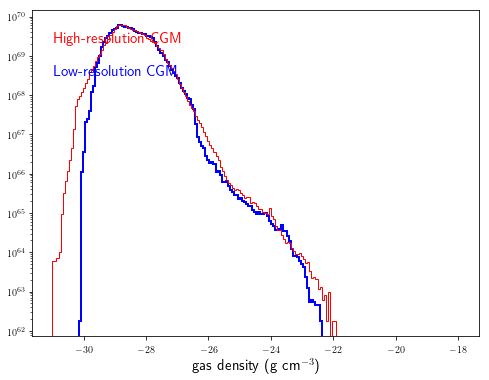

In [27]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

mnv = 0 
mxv = 600
mnd = -31 
mxd = -24
bns = 500


hn = ax.hist(log10(gas_dn_n_o[gd_n].value), weights = V_n[gd_n], histtype = 'step', bins = linspace(-31, -18, 200), linewidth = 2, color = 'blue')
hf = ax.hist(log10(gas_dn_f_o[gd_f].value), weights = V_f[gd_f],  histtype = 'step', bins = linspace(-31, -18, 200), linewidth = 1, color = 'red')


#ax.set_ylim(1.e30, 2.e70)

ax.set_xlabel('gas density (g cm$^{-3}$)', fontsize = 15)
ax.annotate('High-resolution CGM', (0.05, 0.9), xycoords = 'axes fraction', ha = 'left', color = 'red', fontweight = 'bold', fontsize = 15)
ax.annotate('Low-resolution CGM',   (0.05, 0.8), xycoords = 'axes fraction', ha = 'left', color = 'blue', fontweight = 'bold', fontsize = 15)

ax.set_yscale('log')
fig.savefig('%s_densities.pdf'%DDname)

0.08619030220132276 kpc

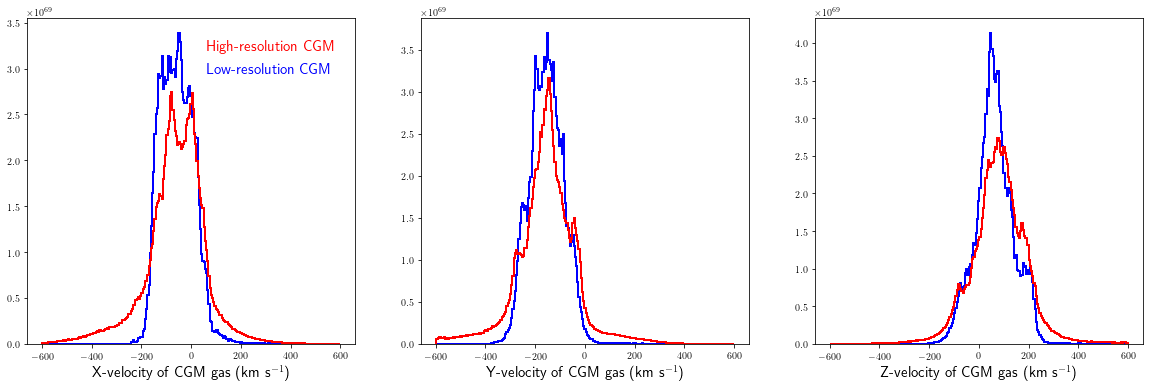

In [10]:
fig, axes = plt.subplots(1,3, figsize = (20,6))

mnv = 0 
mxv = 600
mnd = -31 
mxd = -24
bns = 500

hn = axes[0].hist(gas_vx_n_o.to('km/s').value[gd_n], weights = V_n[gd_n], histtype = 'step', bins = linspace(-600., 600., 250), linewidth = 2, color = 'blue')
hf = axes[0].hist(gas_vx_f_o.to('km/s').value[gd_f], weights = V_f[gd_f],  histtype = 'step', bins = linspace(-600., 600., 250), linewidth = 2, color = 'red')

hn = axes[1].hist(gas_vy_n_o.to('km/s').value[gd_n], weights = V_n[gd_n], histtype = 'step', bins = linspace(-600., 600., 250), linewidth = 2, color = 'blue')
hf = axes[1].hist(gas_vy_f_o.to('km/s').value[gd_f], weights = V_f[gd_f],  histtype = 'step', bins = linspace(-600., 600., 250), linewidth = 2, color = 'red')

hn = axes[2].hist(gas_vz_n_o.to('km/s').value[gd_n], weights = V_n[gd_n], histtype = 'step', bins = linspace(-600., 600., 250), linewidth = 2, color = 'blue')
hf = axes[2].hist(gas_vz_f_o.to('km/s').value[gd_f], weights = V_f[gd_f],  histtype = 'step', bins = linspace(-600., 600., 250), linewidth = 2, color = 'red')





axes[0].annotate('High-resolution CGM', (0.55, 0.9), xycoords = 'axes fraction', ha = 'left', color = 'red', fontweight = 'bold', fontsize = 15)
axes[0].annotate('Low-resolution CGM',   (0.55, 0.83), xycoords = 'axes fraction', ha = 'left', color = 'blue', fontweight = 'bold', fontsize = 15)






axes[0].set_xlabel('X-velocity of CGM gas (km s$^{-1}$)', fontsize = 15)
axes[1].set_xlabel('Y-velocity of CGM gas (km s$^{-1}$)', fontsize = 15)
axes[2].set_xlabel('Z-velocity of CGM gas (km s$^{-1}$)', fontsize = 15)

fig.savefig('%s_XYZ_velocity_distribution.pdf'%DDname)






In [11]:
vel_n = sqrt(gas_vx_n_o**2. + 
             gas_vy_n_o**2. + 
             gas_vz_n_o**2.)/sqrt(3.)

vel_f = sqrt(gas_vx_f_o**2. + 
             gas_vy_f_o**2. + 
             gas_vz_f_o**2.)/sqrt(3.)

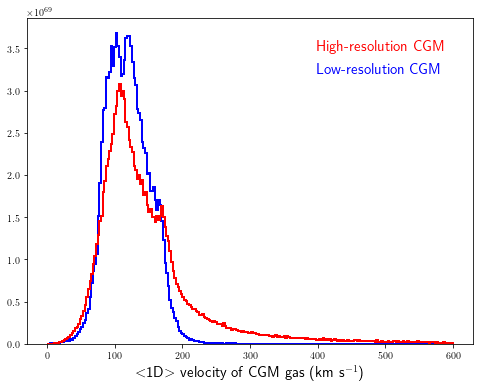

In [12]:
fig, axes = plt.subplots(1,1, figsize = (8,6))

mnv = 0 
mxv = 600
mnd = -31 
mxd = -24
bns = 500

hn = axes.hist(vel_n.to('km/s').value[gd_n], weights = V_n[gd_n], histtype = 'step', bins = linspace(0., 600., 250), linewidth = 2, color = 'blue')
hf = axes.hist(vel_f.to('km/s').value[gd_f], weights = V_f[gd_f],  histtype = 'step', bins = linspace(0., 600., 250), linewidth = 2, color = 'red')
axes.annotate('High-resolution CGM', (0.65, 0.9), xycoords = 'axes fraction', ha = 'left', color = 'red', fontweight = 'bold', fontsize = 15)
axes.annotate('Low-resolution CGM',   (0.65, 0.83), xycoords = 'axes fraction', ha = 'left', color = 'blue', fontweight = 'bold', fontsize = 15)






axes.set_xlabel('$<$1D$>$ velocity of CGM gas (km s$^{-1}$)', fontsize = 15)
fig.savefig('%s_velocity_distribution.pdf'%DDname)






In [13]:
ram_n = (vel_n**2. * gas_dn_n_o).to('dyn/cm**2')
ram_f = (vel_f**2. * gas_dn_f_o).to('dyn/cm**2')

In [14]:
rand_n = np.random.randint(0, len(gd_n), 5000)
gd_n_t = gd_n[rand_n]
rand_n = np.random.randint(0, len(gd_f), 5000)
gd_f_t = gd_f[rand_n]



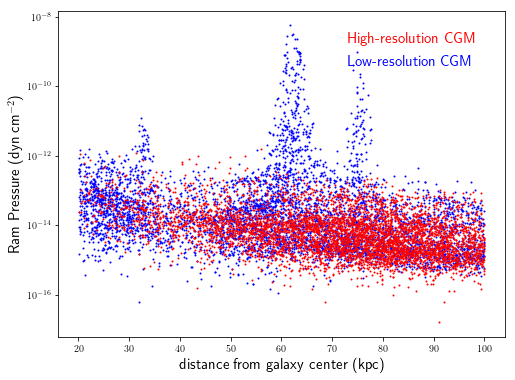

In [15]:
fig, axes = plt.subplots(1,1, figsize = (8,6))

gd = where(vel_f.to('km/s').value[gd_f_t] > 250.)[0]

axes.plot(r_n_gal[gd_n_t], ram_n[gd_n_t], 'b.', markersize = 2.)
axes.plot(r_f_gal[gd_f_t], ram_f[gd_f_t], 'r.', markersize = 2.)

axes.set_yscale('log')

axes.annotate('High-resolution CGM', (0.65, 0.9), xycoords = 'axes fraction', ha = 'left', color = 'red', fontweight = 'bold', fontsize = 15)
axes.annotate('Low-resolution CGM',   (0.65, 0.83), xycoords = 'axes fraction', ha = 'left', color = 'blue', fontweight = 'bold', fontsize = 15)



axes.set_xlabel('distance from galaxy center (kpc)', fontsize = 15)
axes.set_ylabel('Ram Pressure (dyn cm$^{-2}$)', fontsize = 15)

fig.savefig('%s_ram_pressure_rad.pdf'%DDname)






In [16]:
r_f_gal

YTArray([64426.94494862, 64252.51498969, 64078.97564308, ...,
           499.65769137,   499.45388815,   499.25016886]) kpc

In [17]:
ram_f

YTArray([8.64609003e-16, 3.84133773e-16, 2.23851041e-16, ...,
         3.30111443e-12, 2.53508412e-12, 1.90078085e-12]) dyn/cm**2

In [13]:
gas_dn_1_o = ad_f['gas', 'density']
gas_dn_2_o = ad_n['gas', 'density']



In [14]:
dx1_o = ad_f['gas', 'dx']
dx2_o = ad_n['gas', 'dx']

A1_o = dx1_o**3.
A2_o = dx2_o**3.

In [15]:
gas_x_n_gal = gas_x_n_o - yt.YTArray(gp_n['stars_center'][0][0], 'kpc')
gas_y_n_gal = gas_y_n_o - yt.YTArray(gp_n['stars_center'][0][1], 'kpc')
gas_z_n_gal = gas_z_n_o - yt.YTArray(gp_n['stars_center'][0][2], 'kpc')


gas_x_f_gal = gas_x_f_o - yt.YTArray(gp_f['stars_center'][0][0], 'kpc')
gas_y_f_gal = gas_y_f_o - yt.YTArray(gp_f['stars_center'][0][1], 'kpc')
gas_z_f_gal = gas_z_f_o - yt.YTArray(gp_f['stars_center'][0][2], 'kpc')


r_n_gal = sqrt(gas_x_n_gal**2. + gas_y_n_gal**2. + gas_z_n_gal**2.).to('kpc')
r_f_gal = sqrt(gas_x_f_gal**2. + gas_y_f_gal**2. + gas_z_f_gal**2.).to('kpc')




In [ ]:
'''
gas_vx_1_gal = gas_vx_1.to('km/s').value - anchor_vxs_box_avg1
gas_vy_1_gal = gas_vy_1.to('km/s').value - anchor_vys_box_avg1
gas_vz_1_gal = gas_vz_1.to('km/s').value - anchor_vzs_box_avg1

gas_x_1_gal = gas_x_1.to('kpc').value - anchor_xs_box_avg1
gas_y_1_gal = gas_y_1.to('kpc').value - anchor_ys_box_avg1
gas_z_1_gal = gas_z_1.to('kpc').value - anchor_zs_box_avg1




gas_vx_2_gal = gas_vx_2.to('km/s').value - anchor_vxs_box_avg2
gas_vy_2_gal = gas_vy_2.to('km/s').value - anchor_vys_box_avg2
gas_vz_2_gal = gas_vz_2.to('km/s').value - anchor_vzs_box_avg2

gas_x_2_gal = gas_x_2.to('kpc').value - anchor_xs_box_avg2
gas_y_2_gal = gas_y_2.to('kpc').value - anchor_ys_box_avg2
gas_z_2_gal = gas_z_2.to('kpc').value - anchor_zs_box_avg2

'''


In [ ]:
gas_v_1_gal_o = sqrt(gas_vx_1_gal**2. + gas_vy_1_gal**2. + gas_vz_1_gal**2.)
gas_v_2_gal_o = sqrt(gas_vx_2_gal**2. + gas_vy_2_gal**2. + gas_vz_2_gal**2.)

gas_p_1_gal_o = sqrt(gas_x_1_gal**2. + gas_y_1_gal**2. + gas_z_1_gal**2.)
gas_p_2_gal_o = sqrt(gas_x_2_gal**2. + gas_y_2_gal**2. + gas_z_2_gal**2.)



In [ ]:
gas_v_1_gal = gas_v_1_gal_o[gas_p_1_gal_o < 100] 
gas_v_2_gal = gas_v_2_gal_o[gas_p_2_gal_o < 100]
gas_p_1_gal = gas_p_1_gal_o[gas_p_1_gal_o < 100]
gas_p_2_gal = gas_p_2_gal_o[gas_p_2_gal_o < 100]



A1 = A1_o[gas_p_1_gal_o < 100]
A2 = A2_o[gas_p_2_gal_o < 100]

gas_dn_1 = gas_dn_1_o[gas_p_1_gal_o < 100]
gas_dn_2 = gas_dn_2_o[gas_p_2_gal_o < 100]




In [ ]:
mpl.rcParams['axes.linewidth'] = 8
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10


fig, axes = plt.subplots(1,2, figsize = (20,10))

mnv = 0 
mxv = 600
mnd = -31 
mxd = -24
bns = 500


P1 = (gas_v_1_gal/sqrt(3))**2. * gas_dn_1
P2 = (gas_v_2_gal/sqrt(3))**2. * gas_dn_2

vmn = 1.e-12
vmx = 5.e-1
im1 = axes[0].hist2d(log10(gas_dn_1),gas_v_1_gal/sqrt(3), weights = A1,normed = True, norm = LogNorm(), vmin = vmn, vmax = vmx, bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])
im2 = axes[1].hist2d(log10(gas_dn_2),gas_v_2_gal/sqrt(3), weights = A2,normed = True, norm = LogNorm(), vmin = vmn, vmax = vmx,bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])


#stf = axes[1].hist2d(log10(gas_dn_2),gas_v_2_gal/sqrt(3), weights = A2, norm = LogNorm(), bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])


for ax in axes:
    ax.set_xlabel(r'gas density, g cm$^{-3}$', fontsize = 20)

axes[0].set_ylabel('1D velocity, km s$^{-1}$ \n(rest-frame of the central galaxy)', fontsize = 20)
axes[1].set_ylabel('')

axes[1].set_yticks([])

Ps = yt.YTArray([1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12], 'dyn/cm**2')

dns = yt.YTArray([1.*10**d for d in linspace(-31, -23, 300)], 'g/cm**3')

for P in Ps:
    vs = sqrt(P/(dns)).to('km/s')
    axes[0].plot(log10(dns), vs, 'k--', linewidth = 3)    
    axes[1].plot(log10(dns), vs, 'k--', linewidth = 3)    
    
    
    
for ax in axes.ravel():
    ax.set_xlim(mnd, mxd)
    ax.set_ylim(mnv, mxv)
    
    
cbar = plt.colorbar(im2[3], ax = axes[1])


axes[0].set_title('low resolution CGM \n(natural refinement)', fontsize = 30)
axes[1].set_title('high resolution CGM \n(forced refinement)', fontsize = 30)

#cbar.set_ticks({})


#cbar.ax.tick_params(labelsize = 20)

cbar.set_label('volume', fontsize = 20)

fig.subplots_adjust(wspace = 0.0)

fig.savefig('velocity_density.png', dpi = 300)




In [ ]:
P1 = (gas_v_1_gal/sqrt(3))**2. * gas_dn_1
P2 = (gas_v_2_gal/sqrt(3))**2. * gas_dn_2


In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))

mnv = 0 
mxv = 600
mnd = -31 
mxd = -24
bns = 500

ax.hist(log10(P1), weights = A1, histtype = 'step', bins = linspace(-27.5, -22, 100), linewidth = 4, '')
ax.hist(log10(P2), weights = A2, histtype = 'step', bins = linspace(-27.5, -22, 100), linewidth = 4, )


#stf = axes[1].hist2d(log10(gas_dn_2),gas_v_2_gal/sqrt(3), weights = A2, norm = LogNorm(), bins = [linspace(mnd, mxd, bns), linspace(mnv, mxv, bns)])



ax.set_xlabel(r'ram pressure, dyn cm$^{-2}$ (v$_{satellite}$ = 0)', fontsize = 20)


fig.savefig('ram_pressure.png', dpi = 300)




In [ ]:
P1


In [ ]:
anchor_vxs_box_avg1

In [ ]:
gas_v_2_gal

In [ ]:

axes[0].set_title('low resolution CGM \n(natural refinement)', fontsize = 30, pad = 20)
axes[1].set_title('high resolution CGM \n(forced refinement)', fontsize = 30, pad = 20)

#cbar.set_ticks({})


#cbar.ax.tick_params(labelsize = 20)


cbar.set_label('volume weighted', fontsize = 24, labelpad = 15)

for ax in axes:
    ax.set_xlabel(r'gas density, g cm$^{-3}$', fontsize = 24)

axes[0].set_ylabel('1D velocity, km s$^{-1}$ \n(rest-frame of the central galaxy)', fontsize = 25)
axes[1].set_ylabel('')

#cbar.set_ticks([1.e-12, 1.e-8, 1.e-4, 1.e0])
cbar.set_ticks([])

fig.subplots_adjust(wspace = 0.05, right = 0.99)


fig.savefig('velocity_density.png', dpi = 300)
